In [166]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [30]:
air_df = pd.read_csv('DataSource/airqualityHanoi.csv')
solar_df = pd.read_csv('DataSource/solar-measurements_vietnam_bacninh_wb-esmap_qc.csv')
water_df = pd.read_csv('DataSource/red_river_delta_water_chemistry.csv')

In [31]:
air_df.head(10)

,Date,Country,City,Specie,count,min,max,median,variance
0,24/01/2020,VN,Ha Noi,pm10,24,13.0,32,23.0,171.01
1,4/5/2020,VN,Ha Noi,pm10,24,26.0,53,34.0,971.01
2,3/10/2020,VN,Ha Noi,pm10,24,16.0,49,26.0,814.33
3,20/12/2020,VN,Ha Noi,pm10,24,19.0,37,26.0,225.92
4,22/12/2020,VN,Ha Noi,pm10,24,31.0,57,52.0,794.78
5,14/02/2020,VN,Ha Noi,pm10,24,18.0,43,29.0,552.10
6,3/4/2020,VN,Ha Noi,pm10,24,11.0,56,20.0,1788.62
7,16/07/2020,VN,Ha Noi,pm10,24,18.0,33,25.0,222.54
8,29/08/2020,VN,Ha Noi,pm10,24,16.0,35,26.0,259.93
9,9/5/2020,VN,Ha Noi,pm10,24,18.0,65,39.0,1838.84


In [32]:
solar_df.head(10)

,JulianTime,DHI_ThPyra2_Wm-2_avg,DNI_ThPyrh1_Wm-2_avg,GHI_ThPyra1_Wm-2_avg,GTI_RefCell1_Wm-2_avg,GTI_RefCell2_Wm-2_avg,GTI_RefCell3_Wm-2_avg,Pres_Logger1_hPa_avg,RH_ThHyg1_per100_avg,ServiceButton_Logger1_-_max,...,Temp_RefCell3_degC_avg_flag,Temp_ThHyg1_degC_avg_flag,Temp_ThPyra1_degC_avg_flag,Temp_ThPyra2_degC_avg_flag,WindDir_Wvane1_deg_avg360_flag,WindSpeed_Anemo1_ms_avg_flag,WindSpeed_Anemo1_ms_max_flag,SunElv_Ephemeris_avg_deg,DHI_ThPyrh2_Wm-2_avg_flag,data-filled
0,2017-09-24 00:00:00,139.167,0.734694,140.278,142.042,141.675,140.815,1003.57,92.3014,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.603022,NaN,1.0
1,2017-09-24 00:01:00,151.598,2.163260,153.438,157.023,156.688,155.277,1003.54,92.3076,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.834214,NaN,1.0
2,2017-09-24 00:02:00,165.882,4.653060,168.795,174.810,174.108,172.274,1003.52,92.3176,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.065355,NaN,1.0
3,2017-09-24 00:03:00,184.490,6.122450,187.920,196.936,196.130,193.918,1003.50,92.2482,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.296443,NaN,1.0
4,2017-09-24 00:04:00,207.549,10.258500,212.354,224.712,223.760,221.212,1003.51,92.2059,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.527479,NaN,1.0
5,2017-09-24 00:05:00,231.455,56.571400,249.706,266.298,265.058,261.224,1003.54,91.8681,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.758461,NaN,1.0
6,2017-09-24 00:06:00,252.193,111.279000,285.728,304.538,303.097,298.169,1003.56,91.4100,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.989388,NaN,1.0
7,2017-09-24 00:07:00,267.729,109.660000,300.309,320.067,318.331,313.403,1003.59,90.8922,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18.220260,NaN,1.0
8,2017-09-24 00:08:00,275.392,14.462600,281.503,303.738,302.482,299.527,1003.60,90.6659,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18.451075,NaN,1.0
9,2017-09-24 00:09:00,279.104,126.068000,319.543,341.404,339.770,334.486,1003.59,90.7386,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18.681833,NaN,1.0


In [33]:
water_df.head(10)

,Site name,Site code,Date,Date (formatted),Month,Year,Season,Lattitude,Longitude,Time,...,Violaxanthin nmol/L,Diadinoxanthin nmol/L,Diatoxanthin nmol/L,Lutein nmol/L,Zeaxanthin nmol/L,Canthaxanthin nmol/L,Chl a nmol/L,Chl a'1 nmol/L,Chl a'2 nmol/L,Unnamed: 44
0,Phung dam,D1,07/02/2018,07/02/2018,2,2018,DRY,21.0752,105.6451,8h05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Phung dam,D1,07/03/2018,07/03/2018,3,2018,DRY,21.0752,105.6451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Phung dam,D1,05/04/2018,05/04/2018,4,2018,DRY,21.0752,105.6451,8h00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Phung dam,D1,15/05/2018,15/05/2018,5,2018,WET,21.0752,105.6451,8h00,...,0.617,2.164,0.000,4.342,0.000,0.742,28.723,6.749,1.908,NaN
4,Phung dam,D1,06/06/2018,06/06/2018,6,2018,WET,21.0752,105.6451,6h50,...,1.451,0.000,0.000,8.342,0.000,0.374,2.380,28.924,0.967,NaN
5,Phung dam,D1,11/07/2018,11/07/2018,7,2018,WET,21.0752,105.6451,7h45,...,0.054,0.000,0.060,0.683,0.000,0.000,2.105,0.290,0.226,NaN
6,Phung dam,D1,08/08/2018,08/08/2018,8,2018,WET,21.0752,105.6451,8h00,...,0.807,4.993,0.000,5.488,0.000,0.316,39.509,5.420,3.644,NaN
7,Phung dam,D1,06/09/2018,06/09/2018,9,2018,WET,21.0752,105.6451,8h00,...,1.380,5.598,0.000,7.970,0.000,0.319,44.799,6.083,3.842,NaN
8,Phung dam,D1,11/10/2018,11/10/2018,10,2018,DRY,21.0752,105.6451,7h50,...,0.174,0.682,0.118,0.627,0.976,0.170,5.588,1.159,0.840,NaN
9,Phung dam,D1,05/11/2018,05/11/2018,11,2018,DRY,21.0752,105.6451,8h00,...,0.126,0.000,0.128,0.489,0.489,0.182,7.014,1.162,1.444,NaN


## DF Shape
Mỗi df chỉ lấy 434 rows

In [50]:
print('Air: ', air_df.shape)
print('Solar: ', solar_df.shape)
print('Water: ', water_df.shape)

Air:  (2453, 9)
Solar:  (1149120, 40)
Water:  (434, 45)


In [51]:
sample_air_df = air_df.sample(n=434, random_state=42)
sample_solar_df = solar_df.sample(n=434, random_state=42)

In [53]:
print('Air: ', sample_air_df.shape)
print('Solar: ', sample_solar_df.shape)
print('Water: ', water_df.shape)

Air:  (434, 9)
Solar:  (434, 40)
Water:  (434, 45)


#Info

In [54]:
sample_air_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 2115 to 2355
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      434 non-null    object 
 1   Country   434 non-null    object 
 2   City      434 non-null    object 
 3   Specie    434 non-null    object 
 4   count     434 non-null    int64  
 5   min       434 non-null    float64
 6   max       434 non-null    int64  
 7   median    434 non-null    float64
 8   variance  434 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 33.9+ KB


In [55]:
sample_solar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 250230 to 757778
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   JulianTime                        434 non-null    object 
 1   DHI_ThPyra2_Wm-2_avg              434 non-null    float64
 2   DNI_ThPyrh1_Wm-2_avg              434 non-null    float64
 3   GHI_ThPyra1_Wm-2_avg              434 non-null    float64
 4   GTI_RefCell1_Wm-2_avg             434 non-null    float64
 5   GTI_RefCell2_Wm-2_avg             434 non-null    float64
 6   GTI_RefCell3_Wm-2_avg             434 non-null    float64
 7   Pres_Logger1_hPa_avg              434 non-null    float64
 8   RH_ThHyg1_per100_avg              434 non-null    float64
 9   ServiceButton_Logger1_-_max       434 non-null    float64
 10  Temp_Logger1_degC_avg             434 non-null    float64
 11  Temp_RefCell1_degC_avg            434 non-null    float64
 12  Temp_

In [56]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Site name              434 non-null    object 
 1   Site code              434 non-null    object 
 2   Date                   434 non-null    object 
 3   Date (formatted)       434 non-null    object 
 4   Month                  434 non-null    int64  
 5   Year                   434 non-null    int64  
 6   Season                 434 non-null    object 
 7   Lattitude              434 non-null    float64
 8   Longitude              434 non-null    float64
 9   Time                   251 non-null    object 
 10  T-C                    404 non-null    object 
 11  DO mgO2/l              433 non-null    float64
 12  Sal ppt                433 non-null    float64
 13  pH                     434 non-null    float64
 14  Turbidity NTU          433 non-null    float64
 15  Conduc

In [137]:
# vì số lượng rows không đồng đều nên mỗi df sẽ lấy 434 dòng (lấy theo df có ít row nhất - water_df)
sample_air_df = air_df.sample(n=434, random_state=42)
sample_solar_df = solar_df.sample(n=434, random_state=4)

## C1: phân cụm dữ liệu từng bảng rồi ghép kết quả phân cụm của các bảng lại với nhau. Sau đó phân cụm bảng vừa có và ghép với bộ dữ liệu

### Tia UV

In [85]:
# chỉ lấy cột GHI_ThPyra1_Wm-2_avg trong tập solar để tính chỉ số UV index (đo lường ảnh hưởng của tia UV với con người)
sample_solar_df['UV_Index'] = 40 * (sample_solar_df['GHI_ThPyra1_Wm-2_avg'] / 1000)
print(sample_solar_df[['GHI_ThPyra1_Wm-2_avg', 'UV_Index']].head(10))

        GHI_ThPyra1_Wm-2_avg  UV_Index
993935               945.477  37.81908
515708               171.330   6.85320
768828                 0.000   0.00000
949330               544.127  21.76508
817623                 0.000   0.00000
321284               744.743  29.78972
210721               235.187   9.40748
939037               707.740  28.30960
468878                 0.000   0.00000
604818                96.405   3.85620


In [109]:
def classify_uv_index(uv_index):
    if uv_index <= 2:
        return 0
    elif uv_index <= 5:
        return 1
    else:
        return 2

In [110]:

# Apply the classification function to create a new column 'classification'
sample_solar_df['classification'] = sample_solar_df['UV_Index'].apply(lambda x: classify_uv_index(x))

# Print the first few rows to verify the results
print(sample_solar_df[['UV_Index', 'classification']].head(10))

        UV_Index  classification
993935  37.81908               2
515708   6.85320               2
768828   0.00000               0
949330  21.76508               2
817623   0.00000               0
321284  29.78972               2
210721   9.40748               2
939037  28.30960               2
468878   0.00000               0
604818   3.85620               1


In [111]:
# lưu file csv uv riêng
filtered_df = sample_solar_df[['UV_Index', 'classification']]
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.index += 1  # Start index from 1 instead of 0

# Adding a new column 'Index' starting from 1
filtered_df.insert(0, 'Index', filtered_df.index)
# Exporting to CSV with original index
filtered_df.to_csv('DataSource/ModifiedData/FilteredUv.csv', index=False)

### Air Pollution

In [88]:
# # Chọn các cột cần chuẩn hóa
# columns_to_normalize = ['count', 'min', 'max', 'median', 'variance']

# # Khởi tạo MinMaxScaler
# scaler = MinMaxScaler()

# # Chuẩn hóa các cột được chọn
# sample_air_df[columns_to_normalize] = scaler.fit_transform(sample_air_df[columns_to_normalize])
# print(sample_air_df)

            Date Country    City Specie     count       min       max  \
2115  25/11/2020      VN  Ha Noi    no2  1.000000  0.038879  0.163424   
700   13/08/2020      VN  Ha Noi    so2  0.711111  0.008576  0.011673   
1165  17/12/2020      VN  Ha Noi    aqi  0.466667  0.296741  0.338521   
2417  13/08/2020      VN  Ha Noi    no2  1.000000  0.005146  0.097276   
1626   9/11/2020      VN  Ha Noi     co  1.000000  0.000000  0.073930   
...          ...     ...     ...    ...       ...       ...       ...   
2444    9/6/2020      VN  Ha Noi    no2  1.000000  0.010292  0.120623   
2136    2/1/2020      VN  Ha Noi    no2  1.000000  0.038879  0.151751   
1615   2/12/2020      VN  Ha Noi     co  0.911111  0.000000  0.038911   
1992  17/02/2020      VN  Ha Noi   pm25  1.000000  0.233848  0.610895   
2355   6/12/2020      VN  Ha Noi    no2  1.000000  0.028588  0.159533   

        median  variance  
2115  0.092794  0.011260  
700   0.020218  0.000126  
1165  0.294971  0.014492  
2417  0.035251 

In [142]:
data_for_clustering = sample_air_df[['count', 'min', 'max', 'median', 'variance']]

# Khởi tạo mô hình K-means
kmeans = KMeans(n_clusters=3, random_state=42)

# Huấn luyện mô hình trên dữ liệu
kmeans.fit(data_for_clustering)

# Nhãn của các mẫu
cluster_labels = kmeans.labels_

custom_labels = [0, 1, 2]

# Map cluster labels to custom labels
cluster_labels_custom = [custom_labels[label] for label in cluster_labels]

# Add custom labels to your original DataFrame
data_for_clustering['classification'] = cluster_labels_custom

# Print the first few rows to see the result
print(data_for_clustering)

      count   min  max  median  variance  classification
2115     48   6.9   44    18.0    929.39               1
700      35   1.6    5     4.0     10.43               1
1165     24  52.0   89    57.0   1196.23               1
2417     48   1.0   27     6.9    323.32               1
1626     48   0.1   21     0.2    321.15               1
...     ...   ...  ...     ...       ...             ...
2444     48   1.9   33     9.6    639.59               1
2136     48   6.9   41    16.0    903.67               1
1615     44   0.1   12     7.0    193.34               1
1992     48  41.0  159    91.0  11923.00               2
2355     48   5.1   43    16.0   1352.60               1

[434 rows x 6 columns]


/tmp/ipykernel_20917/1898610651.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['classification'] = cluster_labels_custom


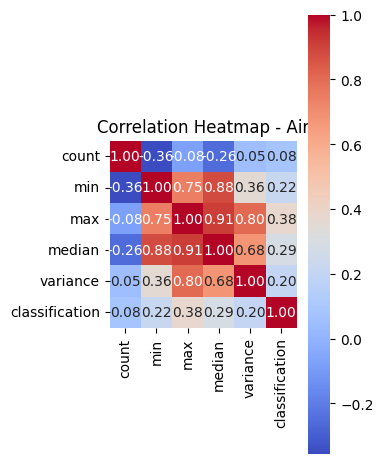

In [139]:
data_for_clustering = data_for_clustering.corr()

# Create a heatmap for sample_air_df_filtered
plt.subplot(1, 2, 1)  # This will create a subplot for air data
sns.heatmap(data_for_clustering, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Heatmap - Air')

plt.tight_layout()
plt.show()

In [143]:
print(data_for_clustering)

      count   min  max  median  variance  classification
2115     48   6.9   44    18.0    929.39               1
700      35   1.6    5     4.0     10.43               1
1165     24  52.0   89    57.0   1196.23               1
2417     48   1.0   27     6.9    323.32               1
1626     48   0.1   21     0.2    321.15               1
...     ...   ...  ...     ...       ...             ...
2444     48   1.9   33     9.6    639.59               1
2136     48   6.9   41    16.0    903.67               1
1615     44   0.1   12     7.0    193.34               1
1992     48  41.0  159    91.0  11923.00               2
2355     48   5.1   43    16.0   1352.60               1

[434 rows x 6 columns]


In [144]:
# lưu file csv riêng
filtered_air_df = data_for_clustering
filtered_air_df.reset_index(drop=True, inplace=True)
filtered_air_df.index += 1  # Start index from 1 instead of 0

# Adding a new column 'Index' starting from 1
filtered_air_df.insert(0, 'Index', filtered_air_df.index)
# Exporting to CSV with original index
filtered_air_df.to_csv('DataSource/ModifiedData/FilteredAir.csv', index=False)

### Water pollution

In [186]:
water_df.columns.to_list()

['Site name',
 'Site code',
 'Date ',
 'Date (formatted)',
 'Month',
 'Year',
 'Season',
 'Lattitude',
 'Longitude',
 'Time',
 'T-C',
 'DO mgO2/l',
 'Sal ppt',
 'pH',
 'Turbidity NTU',
 'Conductivity uS/cm',
 'TDS mg/l',
 'NO3-N mgN/l',
 'NO2-N mgN/l',
 'NH4-N mgN/l',
 'Ntot mgN/l',
 'SRP - PO4-P mgP/l',
 'TSP - PO4-P mgP/l',
 'Ptot mgP/l',
 'SiO2 mgSiO2/l',
 'SiO2 mgSi/l',
 'Alkalinity (mol/L)',
 'Alkalinity (umol/L)',
 'Na(mg/l)',
 'Mg (mg/l)',
 'K (mg/l)',
 'Ca (mg/l)',
 'Cl-(mg/l)',
 'SO4 (mg/l)',
 'Fucoxanthin nmol/L',
 'Violaxanthin nmol/L',
 'Diadinoxanthin nmol/L',
 'Diatoxanthin nmol/L',
 'Lutein nmol/L',
 'Zeaxanthin nmol/L',
 'Canthaxanthin nmol/L',
 'Chl a nmol/L',
 "Chl a'1 nmol/L",
 "Chl a'2 nmol/L",
 'Unnamed: 44',
 'cluster']

In [187]:
object_cols_water = water_df.select_dtypes(include=['object']).columns.tolist()
print(object_cols_water)
sample_water_df = water_df
# Drop columns with dtype 'object' from sample_air_df
sample_water_df_filtered = sample_water_df.drop(columns=object_cols_water)


['Site name', 'Site code', 'Date ', 'Date (formatted)', 'Season', 'Time', 'T-C']


In [188]:
print(sample_water_df.shape)

(434, 46)


In [189]:
pollution_columns = [
    'DO mgO2/l', 'Turbidity NTU', 'Conductivity uS/cm', 'TDS mg/l',
    'NO3-N mgN/l', 'NO2-N mgN/l', 'pH' ,'NH4-N mgN/l', 'Ntot mgN/l',
    'SRP - PO4-P mgP/l', 'TSP - PO4-P mgP/l', 'Ptot mgP/l',
    'SiO2 mgSiO2/l', 'Alkalinity (mol/L)', 'Na(mg/l)', 'Mg (mg/l)',
    'K (mg/l)', 'Ca (mg/l)', 'Cl-(mg/l)', 'SO4 (mg/l)', 'Chl a nmol/L'
]

In [197]:
# Filter the DataFrame to include only the selected columns
data_for_clustering = sample_water_df[pollution_columns]
not_null_mask = data_for_clustering.notnull()
print(data_for_clustering)

     DO mgO2/l  Turbidity NTU  Conductivity uS/cm  TDS mg/l  NO3-N mgN/l  \
0         8.41           20.1               490.3    0.3143        2.133   
1         4.25           28.0               403.0    0.2578        1.017   
2         4.17           14.0               294.0    0.1889        0.264   
3         4.77           34.5               295.2    0.1887        0.390   
4         4.58           28.6               295.7    0.1888        0.094   
..         ...            ...                 ...       ...          ...   
429       4.04           10.2               195.7    0.1252        1.097   
430       3.43            9.7               178.9    0.1141        0.794   
431       4.13            9.6               175.7    0.1124        0.504   
432       2.94           10.7               187.8    0.1203        0.619   
433       4.08           23.0               183.9    0.1170          NaN   

     NO2-N mgN/l    pH  NH4-N mgN/l  Ntot mgN/l  SRP - PO4-P mgP/l  ...  \
0          0

In [198]:
# Step 2: Calculate the median
median_values = data_for_clustering.median()

# Step 3: Fill null values with median
water_df_filled = data_for_clustering.fillna(median_values)
data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)

/tmp/ipykernel_20917/3968636787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)


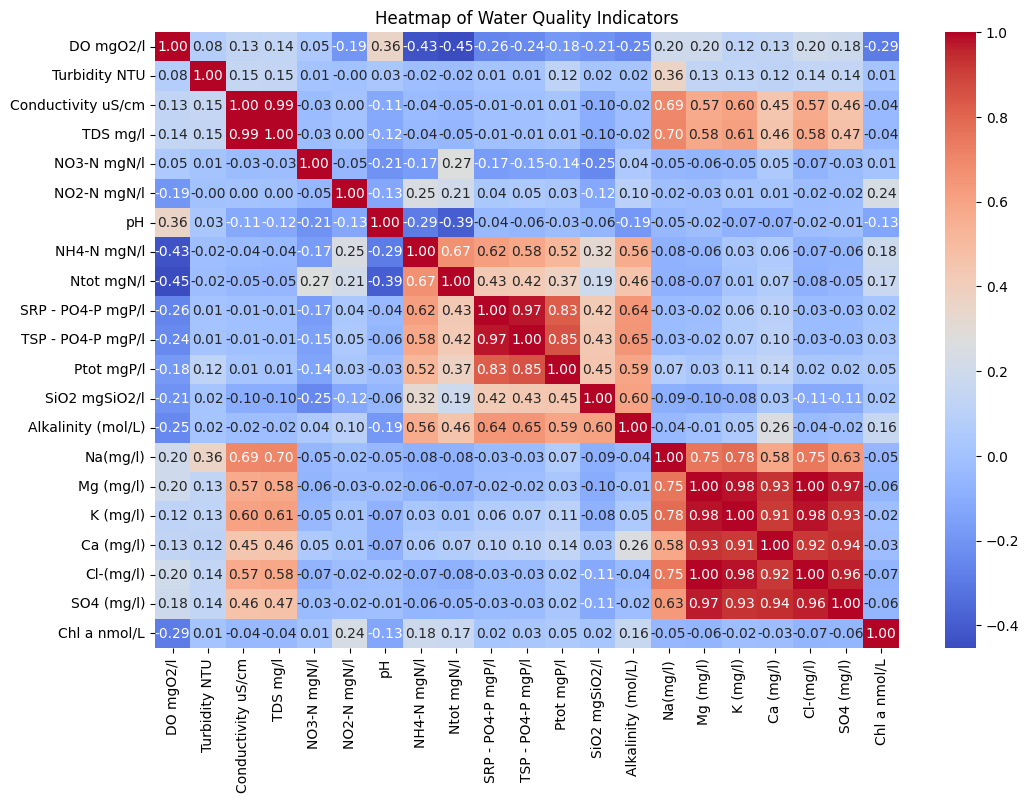

In [199]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_for_clustering.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap of Water Quality Indicators')
plt.show()

In [200]:
# Standardize the data
crucial_columns = ['DO mgO2/l','Na(mg/l)','SO4 (mg/l)']
choose_water_df = data_for_clustering[crucial_columns]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(choose_water_df)

# Initialize K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit K-means clustering model to the scaled data
kmeans.fit(data_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assign custom labels [0, 1, 2]
custom_labels = [0, 1, 2]

# Map cluster labels to custom labels
cluster_labels_custom = [custom_labels[label] for label in cluster_labels]

# Add custom labels to your original DataFrame
choose_water_df['classification'] = cluster_labels_custom

# Print the first few rows to see the result
print(choose_water_df.head())

   DO mgO2/l  Na(mg/l)  SO4 (mg/l)  classification
0       8.41    10.200       6.142               1
1       4.25     9.400      11.564               1
2       4.17     9.666       8.953               1
3       4.77     8.739      11.138               1
4       4.58     8.630       8.019               1


/tmp/ipykernel_20917/2623142579.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose_water_df['classification'] = cluster_labels_custom


In [201]:
# lưu file csv riêng
filtered_water_df = choose_water_df
filtered_water_df.reset_index(drop=True, inplace=True)
filtered_water_df.index += 1  # Start index from 1 instead of 0

# Adding a new column 'Index' starting from 1
filtered_water_df.insert(0, 'Index', filtered_water_df.index)
# Exporting to CSV with original index
filtered_water_df.to_csv('DataSource/ModifiedData/FilteredWater.csv', index=False)

#### MERGE 3 DATAFRAME INTO A DATAFRAME

In [247]:
r_air_df = pd.DataFrame({'air_affect': filtered_air_df['classification']})
r_uv_df = pd.DataFrame({'Uv_affect': filtered_df['classification']})
r_water_df = pd.DataFrame({'water_affect': filtered_water_df['classification']})
r_combined_df = pd.concat([r_air_df, r_uv_df, r_water_df], axis=1)
print(r_combined_df)

     air_affect  Uv_affect  water_affect
1             1          2             1
2             1          2             1
3             1          0             1
4             1          2             1
5             1          0             1
..          ...        ...           ...
430           1          2             1
431           1          0             1
432           1          0             1
433           2          0             0
434           1          1             1

[434 rows x 3 columns]


In [248]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(r_combined_df)

# Initialize K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit K-means clustering model to the scaled data
kmeans.fit(data_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assign custom labels [0, 1, 2]
custom_labels = [0, 1, 2]

# Map cluster labels to custom labels
cluster_labels_custom = [custom_labels[label] for label in cluster_labels]

# Add custom labels to your original DataFrame
r_combined_df['classification'] = cluster_labels_custom

# Print the first few rows to see the result
grouped_data = r_combined_df.groupby('classification')
for classification, group in grouped_data:
    print(f"Nhóm {classification}: {len(group)} mẫu")
print(r_combined_df.head(10))

Nhóm 0: 14 mẫu
Nhóm 1: 290 mẫu
Nhóm 2: 130 mẫu
    air_affect  Uv_affect  water_affect  classification
1            1          2             1               1
2            1          2             1               1
3            1          0             1               1
4            1          2             1               1
5            1          0             1               1
6            1          2             1               1
7            1          2             0               1
8            1          2             1               1
9            1          0             0               2
10           1          1             0               2


In [260]:
# ghép kết quả classification vừa có với dữ liệu số từ 3 bộ dữ liệu
air_df_value = filtered_air_df[['max','median','variance']]
uv_df_value = filtered_df[['UV_Index']]
water_df_value = filtered_water_df[['DO mgO2/l','Na(mg/l)','SO4 (mg/l)']]
classification_df_value = r_combined_df[['classification']]
combined_1_df = pd.concat([air_df_value, uv_df_value, water_df_value, classification_df_value], axis=1)
grouped_data = combined_1_df.groupby('classification')
for classification, group in grouped_data:
    print(f"Nhóm {classification}: {len(group)} mẫu")
print(combined_1_df.head(10))

Nhóm 0: 14 mẫu
Nhóm 1: 290 mẫu
Nhóm 2: 130 mẫu
    max  median  variance  UV_Index  DO mgO2/l  Na(mg/l)  SO4 (mg/l)  \
1    44    18.0    929.39  37.81908       8.41    10.200       6.142   
2     5     4.0     10.43   6.85320       4.25     9.400      11.564   
3    89    57.0   1196.23   0.00000       4.17     9.666       8.953   
4    27     6.9    323.32  21.76508       4.77     8.739      11.138   
5    21     0.2    321.15   0.00000       4.58     8.630       8.019   
6    34    25.0    562.88  29.78972       5.27     4.000      10.777   
7    59    13.0   3167.37   9.40748       2.85     4.093       8.577   
8     6     3.0     25.73  28.30960       4.38     6.447       7.339   
9    27     8.0    509.55   0.00000       1.26     8.705       6.659   
10    6     3.0     20.72   3.85620       1.05     7.472       7.125   

    classification  
1                1  
2                1  
3                1  
4                1  
5                1  
6                1  
7            

In [250]:
# lưu file csv riêng
c1_values_df = combined_1_df
c1_values_df.reset_index(drop=True, inplace=True)
c1_values_df.index += 1  # Start index from 1 instead of 0

# Adding a new column 'Index' starting from 1
c1_values_df.insert(0, 'Index', c1_values_df.index)
# Exporting to CSV with original index
c1_values_df.to_csv('DataSource/ModifiedData/C1_PollutionsDataset.csv', index=False)

## C2: ghép các cột được chọn từ 3 bảng rồi mới phân cụm

In [252]:
# Create new dataframes for each of the columns you want to concatenate
air_df_value = filtered_air_df[['max','median','variance']]
uv_df_value = filtered_df[['UV_Index']]
water_df_value = filtered_water_df[['DO mgO2/l','Na(mg/l)','SO4 (mg/l)']]

# Concatenate the new dataframes along columns (axis=1)
combined_values_df = pd.concat([air_df_value, uv_df_value, water_df_value], axis=1)
print(combined_values_df)

     max  median  variance   UV_Index  DO mgO2/l   Na(mg/l)  SO4 (mg/l)
1     44    18.0    929.39  37.819080       8.41  10.200000       6.142
2      5     4.0     10.43   6.853200       4.25   9.400000      11.564
3     89    57.0   1196.23   0.000000       4.17   9.666000       8.953
4     27     6.9    323.32  21.765080       4.77   8.739000      11.138
5     21     0.2    321.15   0.000000       4.58   8.630000       8.019
..   ...     ...       ...        ...        ...        ...         ...
430   33     9.6    639.59  14.058320       4.04   4.640000       8.147
431   41    16.0    903.67   0.165500       3.43   3.555000       5.208
432   12     7.0    193.34   0.000000       4.13   3.456000       5.190
433  159    91.0  11923.00   0.000000       2.94   5.000000       5.652
434   43    16.0   1352.60   2.034788       4.08  92.910161       5.727

[434 rows x 7 columns]


In [253]:
print("Checking for null values:")
print(combined_values_df.isnull().sum())

Checking for null values:
max           0
median        0
variance      0
UV_Index      2
DO mgO2/l     0
Na(mg/l)      0
SO4 (mg/l)    0
dtype: int64


In [254]:
# fillna
avg = combined_values_df['UV_Index'].median()
print(avg)
combined_values_df['UV_Index'] = combined_values_df['UV_Index'].fillna(avg)
print(combined_values_df.isnull().sum())

0.3113034
max           0
median        0
variance      0
UV_Index      0
DO mgO2/l     0
Na(mg/l)      0
SO4 (mg/l)    0
dtype: int64


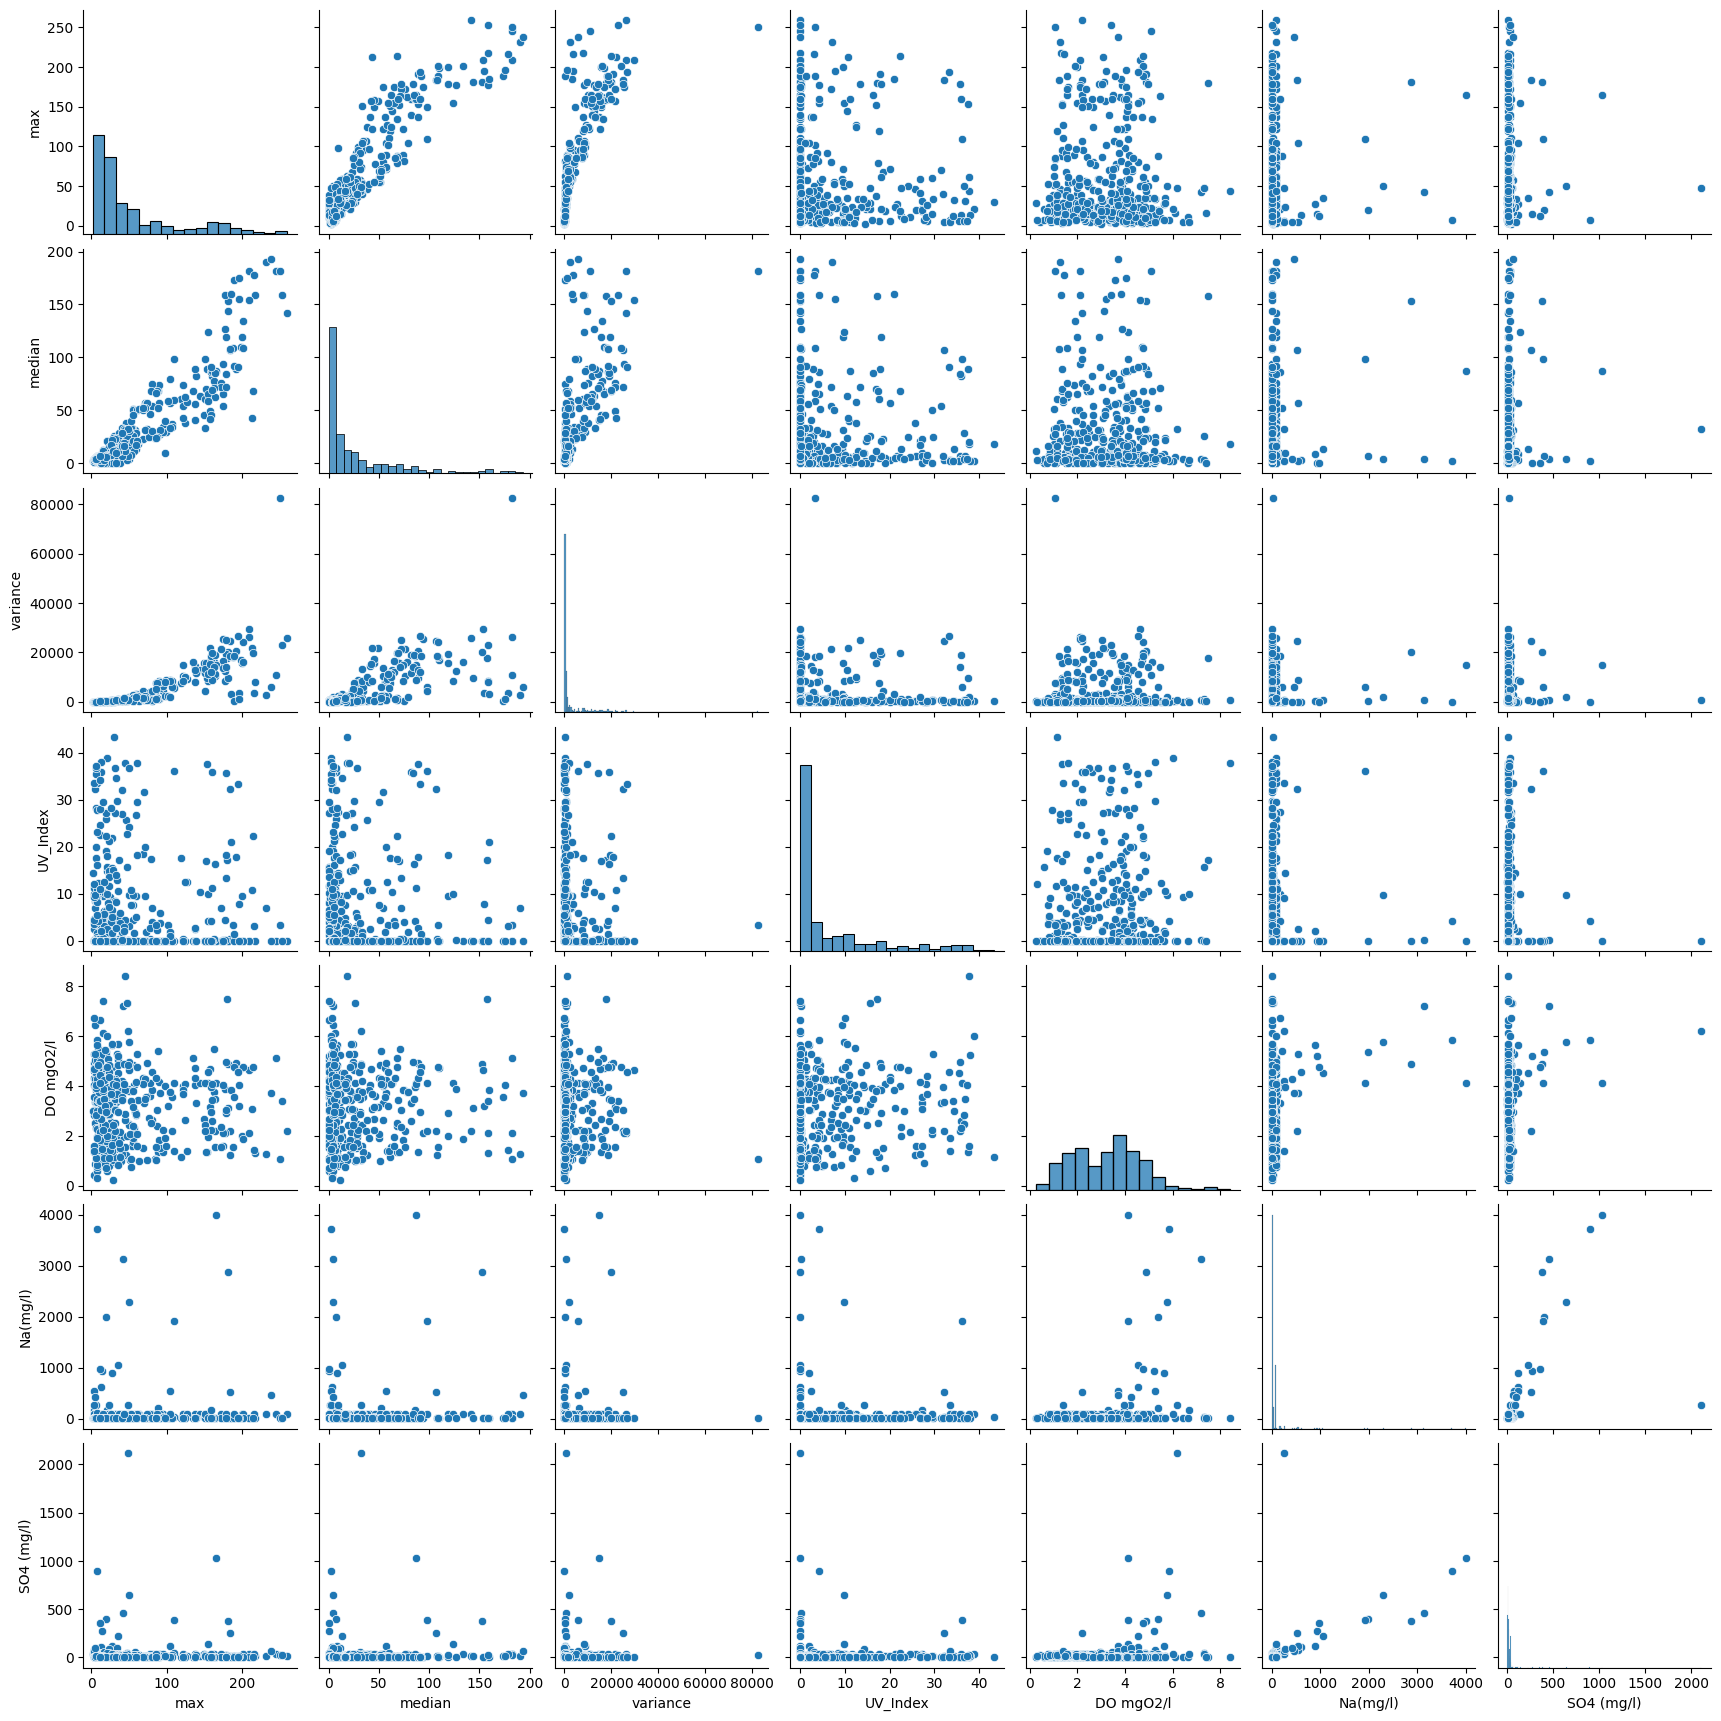

In [255]:
# visualize data
sns.pairplot(combined_values_df)
plt.show()

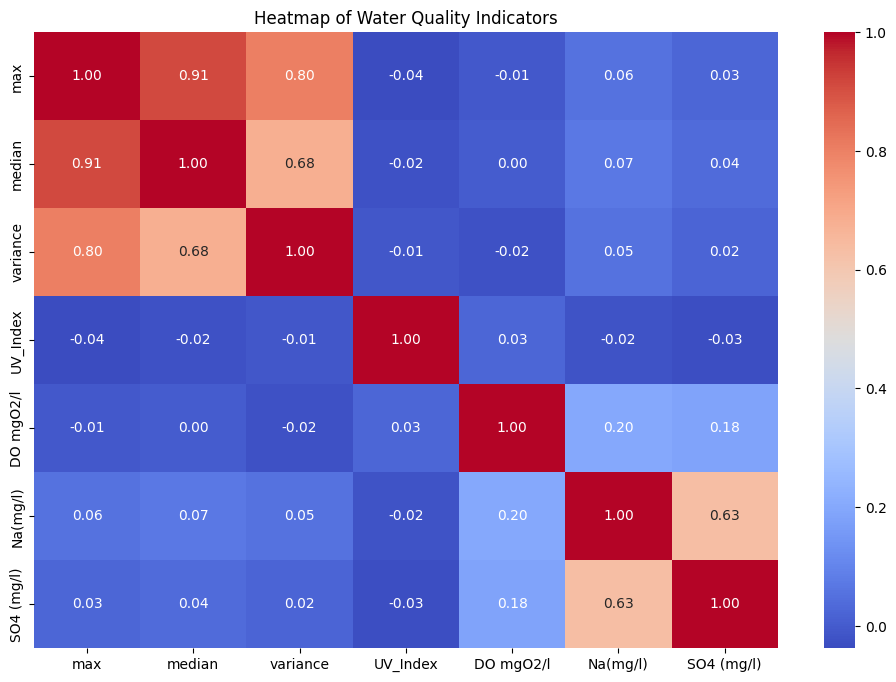

In [256]:
plt.figure(figsize=(12, 8))
sns.heatmap(combined_values_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap of Water Quality Indicators')
plt.show()

In [257]:
backup_df = combined_values_df
scaler = StandardScaler()
data_scaled = scaler.fit_transform(backup_df)

# Initialize K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit K-means clustering model to the scaled data
kmeans.fit(data_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assign custom labels [0, 1, 2]
custom_labels = [0, 1, 2]

# Map cluster labels to custom labels
cluster_labels_custom = [custom_labels[label] for label in cluster_labels]

# Add custom labels to your original DataFrame
backup_df['classification'] = cluster_labels_custom

# Print the first few rows to see the result
grouped_data = backup_df.groupby('classification')
for classification, group in grouped_data:
    print(f"Nhóm {classification}: {len(group)} mẫu")
print(backup_df.head(10))

Nhóm 0: 75 mẫu
Nhóm 1: 351 mẫu
Nhóm 2: 8 mẫu
    max  median  variance  UV_Index  DO mgO2/l  Na(mg/l)  SO4 (mg/l)  \
1    44    18.0    929.39  37.81908       8.41    10.200       6.142   
2     5     4.0     10.43   6.85320       4.25     9.400      11.564   
3    89    57.0   1196.23   0.00000       4.17     9.666       8.953   
4    27     6.9    323.32  21.76508       4.77     8.739      11.138   
5    21     0.2    321.15   0.00000       4.58     8.630       8.019   
6    34    25.0    562.88  29.78972       5.27     4.000      10.777   
7    59    13.0   3167.37   9.40748       2.85     4.093       8.577   
8     6     3.0     25.73  28.30960       4.38     6.447       7.339   
9    27     8.0    509.55   0.00000       1.26     8.705       6.659   
10    6     3.0     20.72   3.85620       1.05     7.472       7.125   

    classification  
1                1  
2                1  
3                1  
4                1  
5                1  
6                1  
7              

In [258]:
# lưu file csv riêng
filtered_values_df = backup_df
filtered_values_df.reset_index(drop=True, inplace=True)
filtered_values_df.index += 1  # Start index from 1 instead of 0

# Adding a new column 'Index' starting from 1
filtered_values_df.insert(0, 'Index', filtered_values_df.index)
# Exporting to CSV with original index
filtered_values_df.to_csv('DataSource/ModifiedData/C2_PollutionsDataset.csv', index=False)